하이퍼 파라메타 튜닝 / 데이터 준비  
최적화 알고리즘 실행 / 학습
  
신경망 제작 /  정규화 / 신경망 확인

### 신경망 훈련 시 결정해야될 것들
#### layers, hidden units, learning rates, activation functions

처음에는 이런 것들이나 다른 파라메타 결정에 적당한 값들을 짐작할 수 없다  
그래서 기계학습 응용은 굉장히 반복적인다.

Idea -> code -> experiment -> idea 를 반복해야 한다.  
 
참고로, 딥 러닝은 여러 분야에서 사용되는데,  
한 영역에서 정답이 다른 영역에서 사용할 때 정답이 아닐 수 있다.  

## 머신 러닝 분야 Data set trend

학습(training set) + 상호 검증(cross validation set / development set) + test set  
예전에는 60% train / 20% dev / 20% test 의 비율로 나누어 졌다  

최근에는 dev set 과 test set 은 매우 작은 비율로 한다  

dev set, test set은 알고리즘들을 시험해 보고 어떤게 더 좋은지 알아내는 것이니까 평가하기에 충분히 많으면 된다  

ex ) 1,000,000개 샘플 중 10,000개 정도  

데이터의 수가 많다면 dev, test set 의 비율을 더 작게 해도 좋다.  

## 딥러닝 분야 Data set trend
더 많은 사람들이 불일치한 train, test 분포에서 트레이닝 하는 것  
ex ) 사진에서 고양이를 분류한다고 가정

Training set : cat pictures  
 - 고화질의 정확히 고양이를 분류할 수 있는 사진들이 많을 것이다.  

Dev/Test sets : cat pictures from users
 - 흐릿하거나, 화질이 좋지 않거나 폰으로 찍은 캐쥬얼한 사진
     -> 데이터의 분포가 전혀 다를 수 있다
     
이런 경우 Dev/Test set 이 똑같은 분포도에서 오게끔 하는 것이 좋다.  

test set 의 목표는 선택한 네트워크에 대하여 바이어스 없는 성능 추정치를 제공하는 것  
만약, 바이어스 없는 추정치가 필요치 않을 경우, test set 이 필요없음  

### Bias / Variance ( 편향 / 편차 )
최근에는 bias 와 variance 문제는 여전히 해결하지만,  
2개의 균형에 대한 내용을 덜 다룬다.

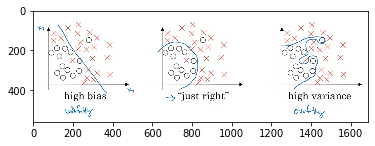

In [7]:
import matplotlib.image as img
import matplotlib.pyplot as plt

arr = img.imread('picture2.png')
plt.imshow(arr)
plt.show()

1번 데이터  
 - 로지스틱 회귀모형으로 데이터를 피팅시킬 수 있다.  
 - 이 경우 데이터가 잘 피팅되지 않은 경우이며, 큰 편향을 초래한다.  
 - underfitting 된 경우
 
3번 데이터
 - 아주 복잡한 신경망일 경우 데이터를 거의 완벽히 분류한다.  
 - overfitting 된 경우  
 
2번 데이터
 - 중간 정도의 복잡도를 가진 데이터

### Bias and Variance 를 설명하는 4가지 경우 ( 예시 )

* Train set error    : 1%  |  15%  |  15%  |  0.5%  
* Dev   set error    : 11% |  16%  |  30%  |    1%

1번의 경우
    - overfit 된 경우 / 일반화가 잘 이루어지지 못한 경우
    - high variance
    
2번의 경우
    - 사람이 거의 0%의 오류를 범한다고 가정하였을 때 underfitting 된 경우
    - Train set 에 제대로 fit 되지 못했으므로 high bias
    
3번의 경우
    - 최악의 경우
    - high bias, variance
    
4번의 경우
    - 최적의 경우
    - low bias, variance

### 각 경우에 시도 할 수 있는 효율적인 방법들

#### 1. High bias / Train set 과 잘 맞지 않을 때
    - Bigger network ( 대부분의 경우 좋은 효율 )
    - Train longer ( 잘 안될때도 있음 )
    - 더 적합한 새로운 신경망 구조를 찾는 것
    
편향을 허용범위 까지 낮춘 후에  

#### 2. High variance
    - 더 많은 데이터 수집
    - 데이터를 구할 수 없을 때 일반화 ( Regularization ) 시도
    - 더 적합한 새로운 신경망 구조를 찾는 것